In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse_metadata.head()
# Combine the data into a single dataset
mouse_study = pd.merge(study_results, mouse_metadata, how = "left", left_on = None)
# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = mouse_study["Mouse ID"].unique()
mice_count = len(mice_count)
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mice = mouse_study.loc[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
#duplicate_mice = duplicate_mice["Mouse ID"]
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mice = mouse_study.loc[mouse_study["Mouse ID"] == "g989", :]

all_duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_df = mouse_study[mouse_study['Mouse ID'].isin(duplicate_mice)==False]
clean_mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# updating number of mice after removing duplicates
real_mice_count = clean_mouse_study_df["Mouse ID"].unique()
real_mice_count = len(real_mice_count)
real_mice_count

248

In [7]:
drug_regimen = clean_mouse_study_df.set_index(["Drug Regimen"])["Tumor Volume (mm3)"]
drug_regimen

Drug Regimen
Capomulin    45.000000
Ketapril     45.000000
Ketapril     45.000000
Ketapril     45.000000
Ketapril     45.000000
               ...    
Capomulin    41.581521
Capomulin    31.023923
Ceftamin     61.433892
Placebo      58.634971
Stelasyn     72.555239
Name: Tumor Volume (mm3), Length: 1880, dtype: float64

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


#mean_tumor_vol = clean_mouse_study_df["Tumor Volume (mm3)"].mean()
#median_tumor_vol = clean_mouse_study_df["Tumor Volume (mm3)"].median()
#variance_tumor_vol = clean_mouse_study_df["Tumor Volume (mm3)"].variance()
#std_tumor_vol = clean_mouse_study_df["Tumor Volume (mm3)"].std()
#sem_tumor_vol = clean_mouse_study_df["Tumor Volume (mm3)"].sem()
#mean_tumor_vol

drug_regimen_mean = clean_mouse_study_df["Tumor Volume (mm3)"].groupby(clean_mouse_study_df["Drug Regimen"]).mean()
drug_regimen_median = clean_mouse_study_df["Tumor Volume (mm3)"].groupby(clean_mouse_study_df["Drug Regimen"]).median()
drug_regimen_variance = clean_mouse_study_df["Tumor Volume (mm3)"].groupby(clean_mouse_study_df["Drug Regimen"]).var()
drug_regimen_standard_deviation = clean_mouse_study_df["Tumor Volume (mm3)"].groupby(clean_mouse_study_df["Drug Regimen"]).std()
drug_regimen_standard_error_mean = clean_mouse_study_df["Tumor Volume (mm3)"].groupby(clean_mouse_study_df["Drug Regimen"]).sem()

#dr_mean_median = pd.merge(drug_regimen_mean,drug_regimen_median,how="left",on="Drug Regimen")
#dr_mean_median_variance = pd.merge(dr_mean_median, drug_regimen_variance,how="left",on="Drug Regimen")
#dr_std_dev_err = pd.merge(drug_regimen_standard_deviation, drug_regimen_standard_error_mean,how="left",on="Drug Regimen")
#summary_statistics_df = pd.merge(dr_mean_median_variance,dr_std_dev_err,how="left",on="Drug Regimen")
#dr_complete_stat_df
summary_statistics_df = pd.DataFrame(
    {
        "Mean Tumor Volume":drug_regimen_mean,"Median Tumor Volume":drug_regimen_median,"Tumor Volume Variance":drug_regimen_variance,"Tumor Volume Std. Dev.":drug_regimen_standard_deviation,"Tumor Volume Std. Err.":drug_regimen_standard_error_mean
    }
)
#summary_statistics_df.index.name= None#["Drug Regimen"]
summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
#clean_mouse_study.groupby(
    #['Drug Regimen','Tumor Volume (mm3)']).agg(
        #{
            
        #}
#)
summary_statistics_df = clean_mouse_study_df.groupby("Drug Regimen").agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
summary_statistics_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Use the DataFrame.plot() method.

#clean_mouse_study_df.plot.bar(x='Drug Regimen',y='Timepoint',rot=0);
mouse_ID_count = clean_mouse_study_df['Drug Regimen'].value_counts()
mouse_ID_count


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Number of Mice Tested')

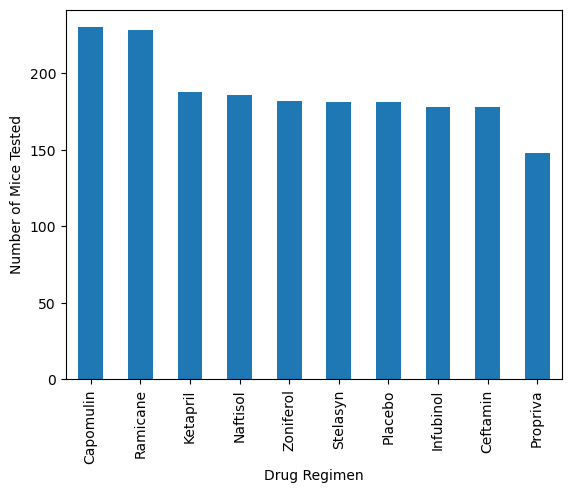

In [11]:
pandas_method = mouse_ID_count.plot.bar()
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')


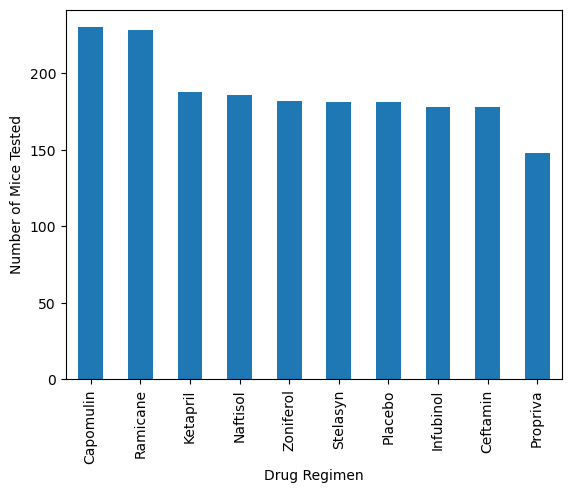

In [12]:
counts = clean_mouse_study_df['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()

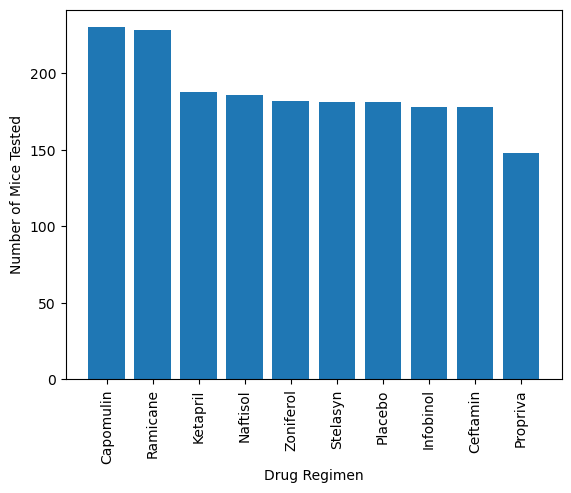

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

xAxis = np.arange(len(mouse_ID_count))
tick_locations = [value for value in xAxis]
plt.bar(xAxis, mouse_ID_count)
plt.xticks(tick_locations,['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn', 'Placebo', 'Infobinol', 'Ceftamin', 'Propriva'])
plt.xticks(rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()


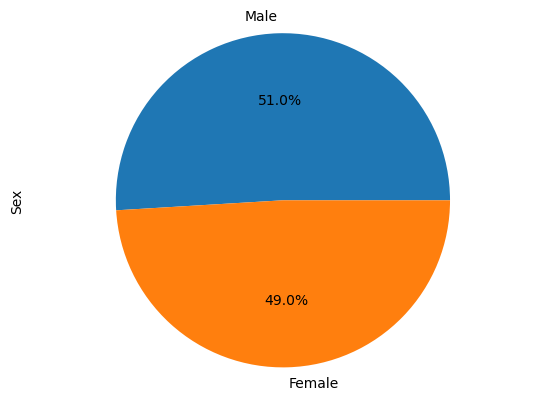

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


sex_count = clean_mouse_study_df['Sex'].value_counts()
sex_count_Pie = sex_count.plot(kind='pie',y='Sex',autopct="%1.1f%%") 

plt.axis('equal')
plt.show()

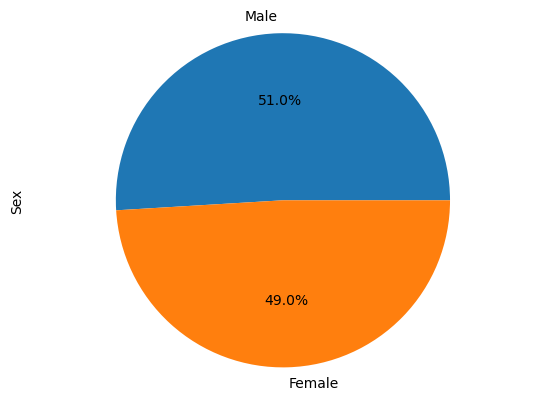

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count,labels=["Male","Female"],autopct="%1.1f%%")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.ylabel("Sex")
plt.show()

In [16]:

max_timepoint_mouseID_df = pd.DataFrame(clean_mouse_study_df.groupby('Mouse ID')['Timepoint'].max())#.sort_values()).reset_index().rename(columns={'Timepoint':'Max Timepoint'})
max_timepoint_mouseID_df

#max_merge_df = pd.merge(max_timepoint_mouseID_df, clean_mouse_study_df)
#max_merge_df

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

max_timepoint_mouseID_df = pd.DataFrame(clean_mouse_study_df["Timepoint"].groupby(clean_mouse_study_df["Mouse ID"]).max())
max_timepoint_mouseID_df 
    
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

#last_timepoint_df = pd.merge(max_timepoint_mouseID, clean_mouse_study_df)
#timepoint = last_timepoint_df['Timepoint']
#mouseID = last_timepoint_df['Mouse ID']
#tumorVolume = last_timepoint_df['Tumor Volume (mm3)']
#metastaticSites = last_timepoint_df['Metastatic Sites']
#drugRegimen = last_timepoint_df['Drug Regimen']
#sex = last_timepoint_df['Sex']
#ageMonths = last_timepoint_df['Age_months']
#weightG = last_timepoint_df['Weight (g)']
#maxTimepoint = last_timepoint_df['Max Timepoint']
#last_timepoint_df
#max_merge_df = pd.DataFrame(
    #{
        #"Timepoint":timepoint,"Mouse ID":mouseID,"Tumor Volume (mm3)":tumorVolume,"Metastatic Sites":metastaticSites,"Drug Regimen":drugRegimen,"Sex":sex,"Age_months":ageMonths,"Weight (g)":weightG
   #}
#)
#max_merge_df["Max Timepoint"] = pd.cut

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [18]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = pd.merge(clean_mouse_study_df,max_timepoint_mouseID_df,how="left", on="Mouse ID" )
#last_timepoint_df

timepoint = last_timepoint_df['Timepoint_x']
mouseID = last_timepoint_df['Mouse ID']
tumorVolume = last_timepoint_df['Tumor Volume (mm3)']
metastaticSites = last_timepoint_df['Metastatic Sites']
drugRegimen = last_timepoint_df['Drug Regimen']
sex = last_timepoint_df['Sex']
ageMonths = last_timepoint_df['Age_months']
weightG = last_timepoint_df['Weight (g)']
maxTimepoint = last_timepoint_df['Timepoint_y']

max_merge_df = pd.DataFrame(
    {
       "Mouse ID":mouseID,"Timepoint":timepoint,"Tumor Volume (mm3)":tumorVolume,"Metastatic Sites":metastaticSites,"Drug Regimen":drugRegimen,"Sex":sex,"Age_months":ageMonths,"Weight (g)":weightG,"Max Timepoint":maxTimepoint
   }
)
max_merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,f932,0,45.000000,0,Ketapril,Male,15,29,0
2,g107,0,45.000000,0,Ketapril,Female,2,29,35
3,a457,0,45.000000,0,Ketapril,Female,11,30,10
4,c819,0,45.000000,0,Ketapril,Male,21,25,40
...,...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25,45
1876,u364,45,31.023923,3,Capomulin,Male,18,17,45
1877,p438,45,61.433892,1,Ceftamin,Female,11,26,45
1878,x773,45,58.634971,4,Placebo,Female,21,30,45


In [19]:

CapRamInfCeft_regimens = max_merge_df.loc[(max_merge_df["Drug Regimen"]=="Capomulin")|(max_merge_df["Drug Regimen"]=="Ramicane")|(max_merge_df["Drug Regimen"]=="Infubinol")|(max_merge_df["Drug Regimen"]=="Ceftamin")]

CapRamInfCeft_regimens = CapRamInfCeft_regimens.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max().reset_index()

final_vol = pd.merge(CapRamInfCeft_regimens,max_merge_df[["Mouse ID", "Timepoint","Tumor Volume (mm3)"]],on=["Mouse ID","Timepoint"],how="left")
final_vol

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
95,Ramicane,s508,45,30.276232
96,Ramicane,u196,45,40.667713
97,Ramicane,w678,5,43.166373
98,Ramicane,y449,15,44.183451


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
#regimen_vol_list = []
cap_vol = []
ram_vol = []
inf_vol = []
cef_vol = []
cap_pot_outliers = []
ram_pot_outliers = []
inf_pot_outliers = []
cef_vol_outliers = []
# Locate the rows which contain mice on each drug and get the tumor volumes
    
# add subset 

for regimen in range(len(final_vol)-1):
    
    if final_vol.loc[regimen,"Drug Regimen"] == "Capomulin":
        cap_vol.append(final_vol.loc[regimen,"Tumor Volume (mm3)"])

    if final_vol.loc[regimen,"Drug Regimen"] == "Ramicane":
        ram_vol.append(final_vol.loc[regimen, "Tumor Volume (mm3)"])
        
    if final_vol.loc[regimen,"Drug Regimen"] == "Infubinol":
        inf_vol.append(final_vol.loc[regimen, "Tumor Volume (mm3)"])
        
    if final_vol.loc[regimen,"Drug Regimen"] == "Ceftamin":
        cef_vol.append(final_vol.loc[regimen, "Tumor Volume (mm3)"])
    
    #if final_vol.loc[regimen,"Drug Regimen"] == "Capomulin" and final_vol.loc[regimen,"Tumor Volume (mm3)"] 
    
# Calculate the IQR and quantitatively determine if there are any potential outliers.   
all_vol_list = [cap_vol,ram_vol,inf_vol,cef_vol]
#all_vol_list

for value in range(len(all_vol_list)):
    
        quartiles = pd.Series(all_vol_list[value]).quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq-lowerq
        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)
        
        print(f"\n{regimens[value]}:")
        print(f"The lower quartile of tumor volumes is: {lowerq}")
        print(f"The upper quartile of tumor volumes is: {upperq}")
        print(f"The interquartile range of tumor volumes is: {iqr}")
        print(f"The the median of tumor volumes is: {quartiles[0.5]} ")
        print(f"Values below {lower_bound} could be outliers.")
        print(f"Values above {upper_bound} could be outliers.")     
# Determine outliers using upper and lower bounds
#for i in range(len(all_vol_list)):
        #if cap_vol.iloc[i] < lower_bound or cap_vol.iloc[i] > upper_bound:
            #cap_pot_outliers.append(cap_vol.iloc[i])
            #print(f"The Capomulin outliers are {cap_pot_outliers}.")
#for outliers in range(len(all_vol_list[value])):
  #if (all_vol_list[value] < lower_bound) or (all_vol_list[value] > upper_bound):
            #outlier = all_vol_list[value][outliers]
            #pot_outliers.append(outlier)
            #print(f"The outliers are {pot_outliers}.") 
 



Capomulin:
The lower quartile of tumor volumes is: 32.37735684
The upper quartile of tumor volumes is: 40.1592203
The interquartile range of tumor volumes is: 7.781863460000004
The the median of tumor volumes is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane:
The lower quartile of tumor volumes is: 32.6240088275
The upper quartile of tumor volumes is: 40.6611829325
The interquartile range of tumor volumes is: 8.037174104999998
The the median of tumor volumes is: 36.893651309999996 
Values below 20.56824767 could be outliers.
Values above 52.71694409 could be outliers.

Infubinol:
The lower quartile of tumor volumes is: 54.04860769
The upper quartile of tumor volumes is: 65.52574285
The interquartile range of tumor volumes is: 11.477135160000003
The the median of tumor volumes is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

Ceftamin:
The lower quar

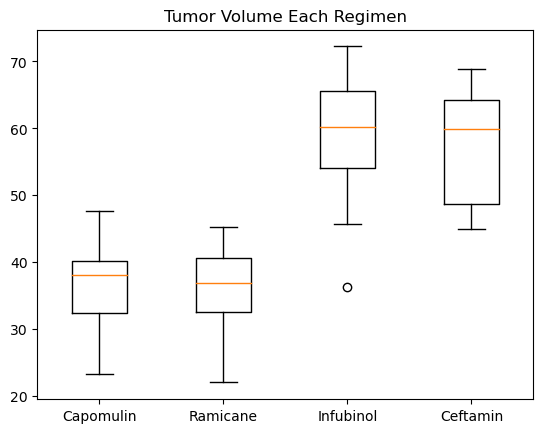

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Each Regimen')

ax1.boxplot(all_vol_list)
ax1.set_xticklabels(regimens)
plt.show()

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse = max_merge_df.loc[max_merge_df["Drug Regimen"] == "Capomulin"]
capomulin_mouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
224,j246,0,45.000000,0,Capomulin,Female,21,21,35
225,r554,0,45.000000,0,Capomulin,Female,8,17,45
226,s185,0,45.000000,0,Capomulin,Female,3,17,45
227,b742,0,45.000000,0,Capomulin,Male,7,21,45
...,...,...,...,...,...,...,...,...,...
1841,s710,45,40.728578,1,Capomulin,Female,1,23,45
1846,j119,45,38.125164,1,Capomulin,Female,7,23,45
1865,i557,45,47.685963,1,Capomulin,Female,1,24,45
1875,r944,45,41.581521,2,Capomulin,Male,12,25,45


In [23]:
mouseID_l509 = capomulin_mouse.loc[capomulin_mouse["Mouse ID"] == "l509"]
mouseID_l509

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint
229,l509,0,45.000000,0,Capomulin,Male,17,21,45
251,l509,5,45.851193,0,Capomulin,Male,17,21,45
535,l509,10,46.759074,0,Capomulin,Male,17,21,45
873,l509,15,47.488599,1,Capomulin,Male,17,21,45
973,l509,20,48.070452,2,Capomulin,Male,17,21,45
1136,l509,25,44.006257,2,Capomulin,Male,17,21,45
1402,l509,30,44.708055,2,Capomulin,Male,17,21,45
1487,l509,35,40.207288,2,Capomulin,Male,17,21,45
1710,l509,40,40.770813,2,Capomulin,Male,17,21,45
1758,l509,45,41.483008,3,Capomulin,Male,17,21,45


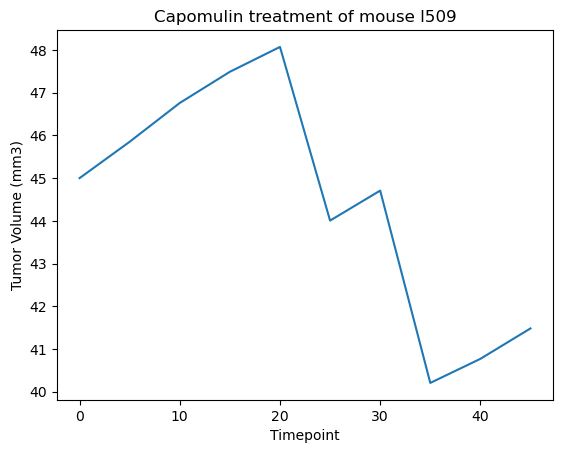

In [24]:
#world_avg, = plt.plot(years, average_unemployment, color="blue", label="World Average" )
plt.plot(mouseID_l509["Timepoint"],mouseID_l509["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

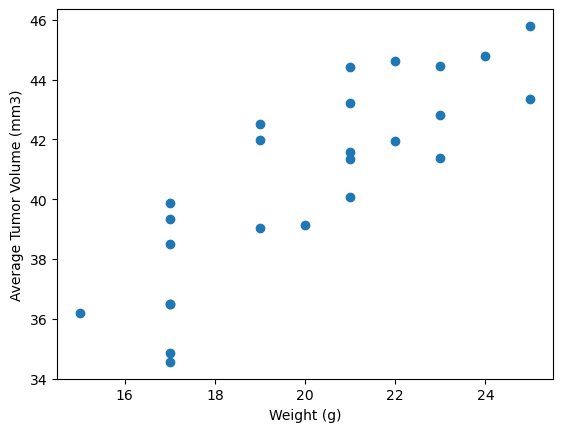

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_DF = max_merge_df.loc[max_merge_df["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
mean_tum_cap = capomulin_DF["Tumor Volume (mm3)"].mean()
weight = capomulin_DF["Weight (g)"].unique()
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(weight,mean_tum_cap)
plt.show()

The correlation between mouse weight and average tumor volume is 0.84.


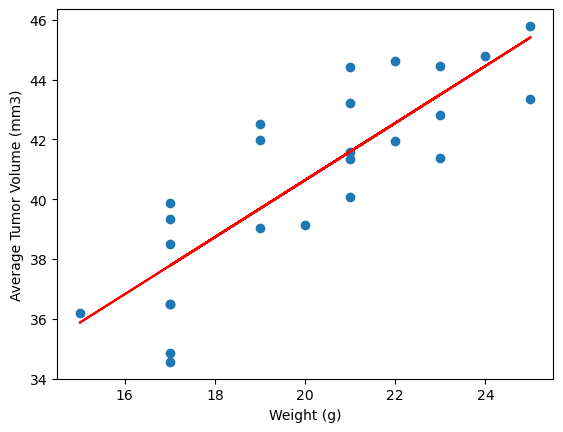

In [37]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = weight.astype(float)
y_values = mean_tum_cap
correlation_coefficient = st.pearsonr(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(5.8,0.8),fontsize=15, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and average tumor volume is {round(correlation_coefficient[0], 2)}.")
plt.show()



